In [105]:
# !pip install catboost
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import tqdm
import gc
import math

import pandas as pd
import numpy as np
import pickle
import os
import seaborn as sns 
from datetime import datetime, timedelta
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np


In [ ]:
path_test = 'https://raw.githubusercontent.com/genie-lee-beep/Jieun-Lee/main/AI%20Competition/jobcare%20recommendation/test.csv'

path_train= 'https://raw.githubusercontent.com/genie-lee-beep/Jieun-Lee/main/AI%20Competition/jobcare%20recommendation/train.csv'

path_sub = 'https://raw.githubusercontent.com/genie-lee-beep/Jieun-Lee/main/AI%20Competition/jobcare%20recommendation/sample_submission.csv'

ori_train = pd.read_csv(path_train)
ori_test = pd.read_csv(path_test)
sample_submission = pd.read_csv(path_sub)

train_size = len(ori_train)
test_size = len(ori_test)

display(ori_train,ori_test)


In [107]:
ori_train.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target'],
      dtype='object')

In [108]:
ori_test.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt'],
      dtype='object')

In [109]:
train = ori_train.drop(['id', 'contents_open_dt'], axis=1) 
test = ori_test.drop(['id', 'contents_open_dt'], axis=1)

In [110]:
train.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'target'],
      dtype='object')

In [111]:
train.dtypes

d_l_match_yn               bool
d_m_match_yn               bool
d_s_match_yn               bool
h_l_match_yn               bool
h_m_match_yn               bool
h_s_match_yn               bool
person_attribute_a        int64
person_attribute_a_1      int64
person_attribute_b        int64
person_prefer_c           int64
person_prefer_d_1         int64
person_prefer_d_2         int64
person_prefer_d_3         int64
person_prefer_e           int64
person_prefer_f           int64
person_prefer_g           int64
person_prefer_h_1         int64
person_prefer_h_2         int64
person_prefer_h_3         int64
contents_attribute_i      int64
contents_attribute_a      int64
contents_attribute_j_1    int64
contents_attribute_j      int64
contents_attribute_c      int64
contents_attribute_k      int64
contents_attribute_l      int64
contents_attribute_d      int64
contents_attribute_m      int64
contents_attribute_e      int64
contents_attribute_h      int64
person_rn                 int64
contents

In [112]:
train.dtypes

d_l_match_yn               bool
d_m_match_yn               bool
d_s_match_yn               bool
h_l_match_yn               bool
h_m_match_yn               bool
h_s_match_yn               bool
person_attribute_a        int64
person_attribute_a_1      int64
person_attribute_b        int64
person_prefer_c           int64
person_prefer_d_1         int64
person_prefer_d_2         int64
person_prefer_d_3         int64
person_prefer_e           int64
person_prefer_f           int64
person_prefer_g           int64
person_prefer_h_1         int64
person_prefer_h_2         int64
person_prefer_h_3         int64
contents_attribute_i      int64
contents_attribute_a      int64
contents_attribute_j_1    int64
contents_attribute_j      int64
contents_attribute_c      int64
contents_attribute_k      int64
contents_attribute_l      int64
contents_attribute_d      int64
contents_attribute_m      int64
contents_attribute_e      int64
contents_attribute_h      int64
person_rn                 int64
contents

## 상관관계 구하기

이유:

In [113]:
# Correlation matrix between numerical values and target
train_num = train[['person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn','target']].corr()

# train_num

corr_train = train_num.apply(lambda x: round(x ,2))
corr_train

,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target
person_attribute_a,1.00,-0.67,0.02,0.05,0.09,0.07,0.05,-0.17,NaN,NaN,...,0.01,-0.00,0.03,0.05,0.00,-0.11,0.02,0.03,0.02,-0.02
person_attribute_a_1,-0.67,1.00,-0.03,-0.05,-0.05,-0.04,-0.00,0.24,NaN,NaN,...,-0.02,0.01,-0.06,-0.02,-0.01,0.17,-0.02,-0.04,-0.03,0.02
person_attribute_b,0.02,-0.03,1.00,0.03,-0.30,-0.30,-0.29,0.04,NaN,NaN,...,0.02,-0.00,0.12,-0.24,0.07,0.06,-0.02,-0.04,-0.03,-0.00
person_prefer_c,0.05,-0.05,0.03,1.00,0.01,0.01,0.01,-0.08,NaN,NaN,...,0.08,-0.01,0.10,-0.00,0.05,-0.03,-0.02,-0.01,-0.01,0.02
person_prefer_d_1,0.09,-0.05,-0.30,0.01,1.00,0.78,0.81,0.03,NaN,NaN,...,-0.01,0.02,-0.16,0.58,-0.07,0.05,0.07,0.01,0.01,-0.03
person_prefer_d_2,0.07,-0.04,-0.30,0.01,0.78,1.00,0.74,0.02,NaN,NaN,...,-0.01,0.02,-0.16,0.56,-0.06,0.05,0.07,0.01,0.01,-0.03
person_prefer_d_3,0.05,-0.00,-0.29,0.01,0.81,0.74,1.00,0.05,NaN,NaN,...,-0.02,0.02,-0.17,0.54,-0.06,0.09,0.07,0.00,0.01,-0.02
person_prefer_e,-0.17,0.24,0.04,-0.08,0.03,0.02,0.05,1.00,NaN,NaN,...,-0.04,0.01,-0.07,0.03,-0.01,0.25,0.02,0.00,0.02,0.03
person_prefer_f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_prefer_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


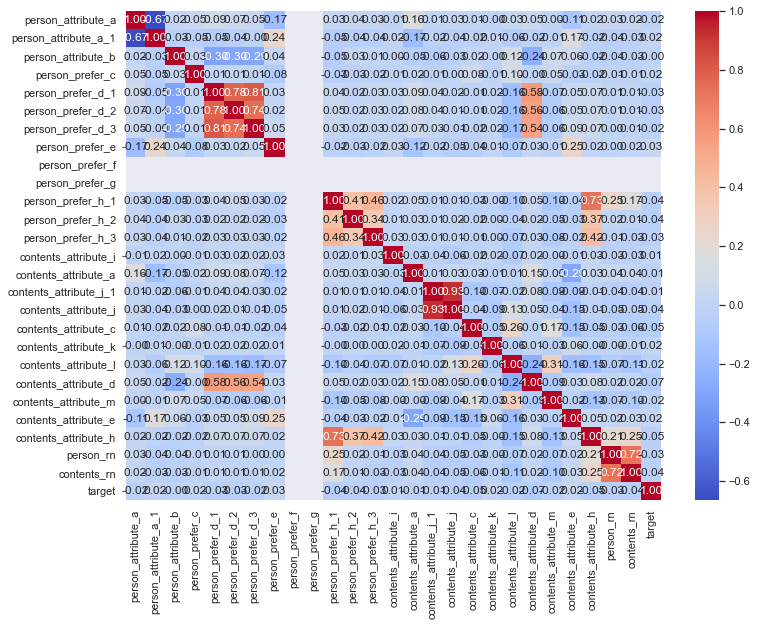

In [114]:
# Correlation matrix between numerical values 

g = sns.heatmap(train[['person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn','target']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

## 특정 컬럼 기준, n번째 상/하위 컬럼 추출하기
- nlargest, nsmallest 를 사용하여 지정한 컬럼 기준 상위, 하위 데이터를 추출할 수 있다. 이를 사용하여 상관관계지수가 높거나 낮은 데이터를 추출한다.

- sort_values와 head를 조합한 방법 보다 더 나은 성능을 제공한다.

- This method is equivalent to df.sort_values(columns, ascending=False).head(n), but more performant.

In [115]:
# 'target' 컬럼기준으로 상위 5개만 뽑기
# df.nlargest(5, 'target')
corr5 = train_num.nlargest(5, 'target')
corr5 = corr5[list(corr5.index)]
corr5

,target,person_prefer_e,contents_attribute_e,contents_attribute_k,person_attribute_a_1
target,1.000000,0.032915,0.024869,0.023783,0.022103
person_prefer_e,0.032915,1.000000,0.249474,0.012769,0.237706
contents_attribute_e,0.024869,0.249474,1.000000,0.061576,0.173618
contents_attribute_k,0.023783,0.012769,0.061576,1.000000,0.007173
person_attribute_a_1,0.022103,0.237706,0.173618,0.007173,1.000000


## One-Hot encoding

In [117]:
oh_train = pd.get_dummies(train, columns = [ 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn'])
oh_train

,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,...,d_m_match_yn_False,d_m_match_yn_True,d_s_match_yn_False,d_s_match_yn_True,h_l_match_yn_False,h_l_match_yn_True,h_m_match_yn_False,h_m_match_yn_True,h_s_match_yn_False,h_s_match_yn_True
0,1,4,3,5,275,370,369,8,1,1,...,0,1,0,1,1,0,1,0,1,0
1,1,3,4,1,114,181,175,4,1,1,...,1,0,1,0,0,1,0,1,1,0
2,2,0,3,5,464,175,452,3,1,1,...,1,0,1,0,0,1,1,0,1,0
3,2,0,2,5,703,705,704,3,1,1,...,1,0,1,0,0,1,1,0,1,0
4,1,3,4,5,275,370,369,4,1,1,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,1,1,2,2,1192,935,1228,3,1,1,...,1,0,1,0,0,1,1,0,1,0
501947,1,6,2,1,118,113,110,4,1,1,...,0,1,1,0,0,1,1,0,1,0
501948,1,7,4,1,147,46,145,4,1,1,...,0,1,0,1,0,1,1,0,1,0
501949,1,1,2,1,46,147,145,4,1,1,...,1,0,1,0,0,1,1,0,1,0


In [118]:
oh_train.shape

(501951, 39)

In [119]:
oh_train.columns

Index(['person_attribute_a', 'person_attribute_a_1', 'person_attribute_b',
       'person_prefer_c', 'person_prefer_d_1', 'person_prefer_d_2',
       'person_prefer_d_3', 'person_prefer_e', 'person_prefer_f',
       'person_prefer_g', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'target',
       'd_l_match_yn_False', 'd_l_match_yn_True', 'd_m_match_yn_False',
       'd_m_match_yn_True', 'd_s_match_yn_False', 'd_s_match_yn_True',
       'h_l_match_yn_False', 'h_l_match_yn_True', 'h_m_match_yn_False',
       'h_m_match_yn_True', 'h_s_match_yn_False', 'h_s_match_yn_True'],
      dtype='object')

In [120]:
# 1인1 person_rn가 아님 
oh_train['person_rn'].nunique() 

300177

In [121]:
# 중복값 없음 
# Before
oh_train[oh_train.duplicated(keep=False)]

print("Before:", len(oh_train))

# After
oh_train = oh_train.drop_duplicates()

print("After:", len(oh_train))

Before: 501951
After: 501951


array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

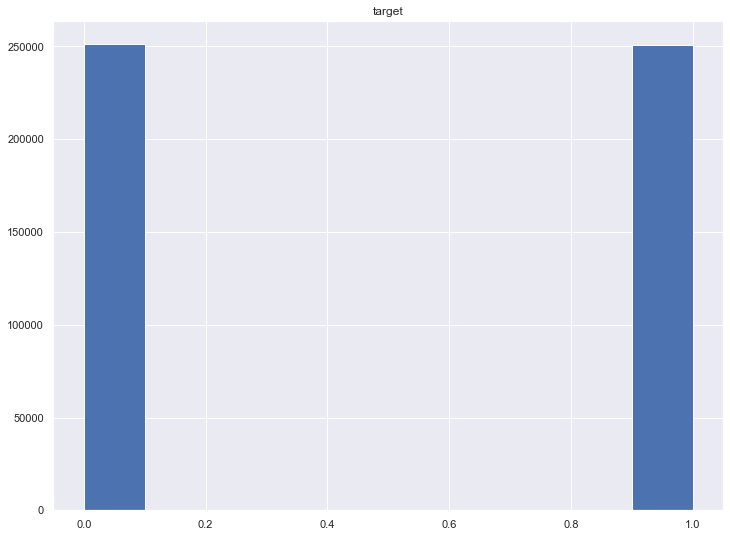

In [122]:
# target data의 imbalance를 확인
oh_train.hist('target')

# Scaling

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

In [124]:
oh_train.describe()

,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,...,d_m_match_yn_False,d_m_match_yn_True,d_s_match_yn_False,d_s_match_yn_True,h_l_match_yn_False,h_l_match_yn_True,h_m_match_yn_False,h_m_match_yn_True,h_s_match_yn_False,h_s_match_yn_True
count,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.0,501951.0,...,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000
mean,1.340055,2.575767,2.782742,2.380049,537.296399,545.833926,534.994095,3.626302,1.0,1.0,...,0.733785,0.266215,0.850071,0.149929,0.204428,0.795572,0.635158,0.364842,0.727804,0.272196
std,0.473728,2.390872,0.883072,1.827910,411.441926,403.328742,415.752072,1.846717,0.0,0.0,...,0.441979,0.441979,0.357002,0.357002,0.403284,0.403284,0.481386,0.481386,0.445091,0.445091
min,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000,0.000000,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,117.000000,148.000000,136.000000,3.000000,1.0,1.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,3.000000,1.000000,453.000000,464.000000,452.000000,4.000000,1.0,1.0,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,2.000000,5.000000,4.000000,5.000000,935.000000,963.000000,929.000000,5.000000,1.0,1.0,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,7.000000,5.000000,5.000000,1258.000000,1258.000000,1258.000000,11.000000,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


http://pyengine.blogspot.com/2013/07/numpy-array_29.html
0723_#임대보증금#임대료 결측치 채우기 모델_Feature Scaling_Cross Validation_Model

In [125]:
oh_train.dtypes

person_attribute_a        int64
person_attribute_a_1      int64
person_attribute_b        int64
person_prefer_c           int64
person_prefer_d_1         int64
person_prefer_d_2         int64
person_prefer_d_3         int64
person_prefer_e           int64
person_prefer_f           int64
person_prefer_g           int64
person_prefer_h_1         int64
person_prefer_h_2         int64
person_prefer_h_3         int64
contents_attribute_i      int64
contents_attribute_a      int64
contents_attribute_j_1    int64
contents_attribute_j      int64
contents_attribute_c      int64
contents_attribute_k      int64
contents_attribute_l      int64
contents_attribute_d      int64
contents_attribute_m      int64
contents_attribute_e      int64
contents_attribute_h      int64
person_rn                 int64
contents_rn               int64
target                    int64
d_l_match_yn_False        uint8
d_l_match_yn_True         uint8
d_m_match_yn_False        uint8
d_m_match_yn_True         uint8
d_s_matc

In [126]:

y = train['target']
X = train.columns 


# 피처스케일링
scaler = StandardScaler()
X_nor = scaler.fit_transform(X)



# scaler = StandardScaler()   
# scaler = scaler.fit_transform(X_train)

# # 교차검증시
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'd_l_match_yn'

In [ ]:

# deeplearning
import tensorflow as tf
from tensorflow.keras import layers  
# from sklearn import tree
# from sklearn.tree import export_graphviz

# machine learning
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier #현재 머신러닝 알고리즘의 왕으로 불리우며, 일반적으로 가장 높은 성능을 자랑한다고 알려져있습니다.(xgboost는 sklearn에 포함되어있지 않아서 별도 설치하셔야합니다!)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

# svm
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score 
from catboost import Pool,CatBoostClassifier


In [ ]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Activation, Reshape, Concatenate
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt
from keras.models import Model as KerasModel
import bisect